<a href="https://colab.research.google.com/github/FokrulBhuiyan/Deep-learning-projects/blob/main/DLP_3_Genre_Classifier_A_Machine_Learning_Approach_to_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Mount dataset from kaggle

In [2]:
!pip install kaggle

In [3]:
# from google.colab import files
# files.upload()  # Upload your kaggle.json file here

In [4]:

# # Create the .kaggle directory if it doesn't exist
# os.makedirs('/root/.kaggle', exist_ok=True)
# # Move the kaggle.json to the correct location
# os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


In [5]:
# !kaggle datasets download -d "prishasawhney/sentiment-analysis-evaluation-dataset" -p "/content/drive/MyDrive/30 Days DL/DLP-3 Genre Text Classifier/dataset"

In [6]:
# import zipfile

# # Path to the downloaded zip file
# zip_path = "/content/drive/MyDrive/30 Days DL/DLP-3 Genre Text Classifier/dataset/sentiment-analysis-evaluation-dataset.zip"

# # Extract to a desired directory on Google Drive
# extract_path = '/content/drive/MyDrive/30 Days DL/DLP-3 Genre Text Classifier/dataset'

# # Extract the files
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print(f"Dataset extracted to: {extract_path}")


## Dataset prepocessing

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv('/content/drive/MyDrive/30 Days DL/DLP-3 Genre Text Classifier/dataset/Education.csv')
df2 = pd.read_csv('/content/drive/MyDrive/30 Days DL/DLP-3 Genre Text Classifier/dataset/Finance.csv')
df3 = pd.read_csv('/content/drive/MyDrive/30 Days DL/DLP-3 Genre Text Classifier/dataset/Politics.csv')
df4 = pd.read_csv('/content/drive/MyDrive/30 Days DL/DLP-3 Genre Text Classifier/dataset/Sports.csv')
df1['Category'] = 'Education'
df2['Category'] = 'Finance'
df3['Category'] = 'Politics'
df4['Category'] = 'Sports'
#print shapes of dataframes
print("Shape of Education dataframe: ", df1.shape)
print("Shape of Finance dataframe: ", df2.shape)
print("Shape of Politics dataframe: ", df3.shape)
print("Shape of Sports dataframe: ", df4.shape)


Shape of Education dataframe:  (52, 3)
Shape of Finance dataframe:  (48, 3)
Shape of Politics dataframe:  (53, 3)
Shape of Sports dataframe:  (56, 3)


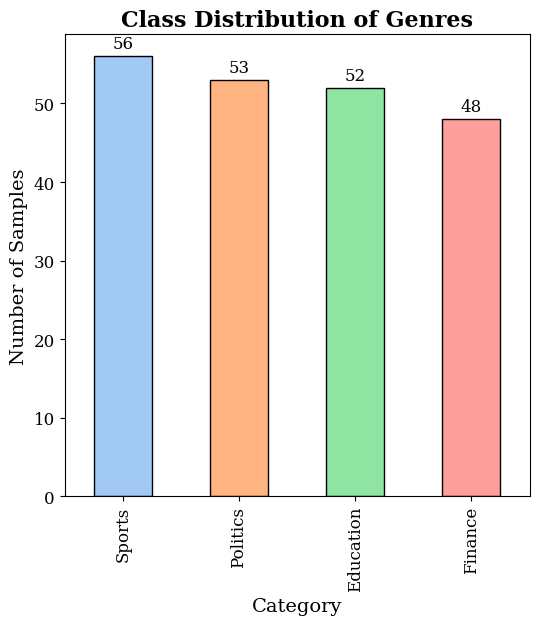

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.concat([df1, df2, df3, df4], ignore_index=True)
colors = sns.color_palette("pastel", df['Category'].nunique())
plt.figure(figsize=(6, 6))
ax = df['Category'].value_counts().plot(
 kind='bar',
 color=colors,
 edgecolor='black',
 linewidth=1.0
)
plt.title('Class Distribution of Genres', fontname='DejaVu Serif', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontname='DejaVu Serif', fontsize=14)
plt.ylabel('Number of Samples', fontname='DejaVu Serif', fontsize=14)
#show values above the bars
for i in ax.patches:
 ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5,
str(i.get_height()), ha='center', va='bottom', fontname='DejaVu Serif',
fontsize=12)
#x axis values and y axis values with font DejaVu Serif and fontsize 12
plt.xticks(fontname='DejaVu Serif', fontsize=12)
plt.yticks(fontname='DejaVu Serif', fontsize=12)
plt.show()

### Pre-Processing Data

In [9]:
#Make all the dataframes have the same number of rows which is the minimum of all the dataframes
min_rows = min(df1.shape[0], df2.shape[0], df3.shape[0], df4.shape[0])
df1 = df1.sample(n=min_rows)
df2 = df2.sample(n=min_rows)
df3 = df3.sample(n=min_rows)
df4 = df4.sample(n=min_rows)
#print the shape
print("Shape of Education dataframe: ", df1.shape)
print("Shape of Finance dataframe: ", df2.shape)
print("Shape of Politics dataframe: ", df3.shape)
print("Shape of Sports dataframe: ", df4.shape)
#Concatenate all the dataframes
df = pd.concat([df1, df2, df3, df4])
df.head()


Shape of Education dataframe:  (48, 3)
Shape of Finance dataframe:  (48, 3)
Shape of Politics dataframe:  (48, 3)
Shape of Sports dataframe:  (48, 3)


,Text,Label,Category
6,School curricula should focus more on practica...,positive,Education
38,Educational technology can be isolating and im...,negative,Education
3,"Despite budget constraints, the school has man...",positive,Education
17,Privatization efforts in education prioritize ...,negative,Education
42,Teacher training programs should focus more on...,positive,Education


In [10]:
#save the dataframe to a csv file
df.to_csv('/content/drive/MyDrive/30 Days DL/DLP-3 Genre Text Classifier/dataset/final_data.csv', index=False)
#for the text extract bag of words and for each sample append in the dataframe 'df'
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
def preprocess_text(text):
 text = re.sub(r'[^\w\s]', '', text, re.UNICODE)
 text = text.lower()
 text = [word for word in text.split() if word not in
stopwords.words('english')]
 text = ' '.join(text)
 return text
df['Text_Preprocessed'] = df['Text'].apply(preprocess_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Text,Label,Category,Text_Preprocessed
6,School curricula should focus more on practica...,positive,Education,school curricula focus practical skills less t...
38,Educational technology can be isolating and im...,negative,Education,educational technology isolating impersonal hi...
3,"Despite budget constraints, the school has man...",positive,Education,despite budget constraints school managed main...
17,Privatization efforts in education prioritize ...,negative,Education,privatization efforts education prioritize pro...
42,Teacher training programs should focus more on...,positive,Education,teacher training programs focus practical clas...


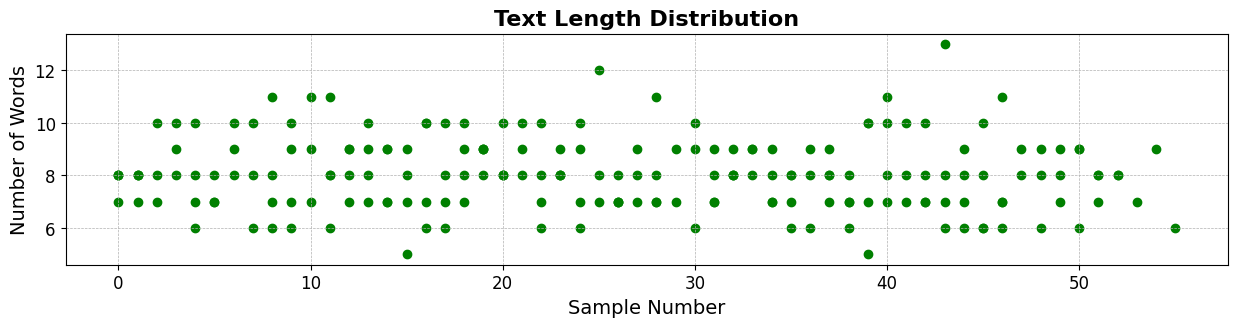

In [11]:
# calculate length of eac text in terms of words and plot as scatter plot
df['Text_Length'] = df['Text_Preprocessed'].apply(lambda x:len(word_tokenize(x)))
df.head()
plt.figure(figsize=(15, 3))
plt.scatter(df.index, df['Text_Length'], color='green')
plt.title('Text Length Distribution', fontname='DejaVu Sans', fontsize=16,
fontweight='bold')
plt.xlabel('Sample Number', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Number of Words', fontname='DejaVu Sans', fontsize=14)
plt.xticks(fontname='DejaVu Sans', fontsize=12)
plt.yticks(fontname='DejaVu Sans', fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.show()


### Feature Extraction


#### Bag of Words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_BOW = vectorizer.fit_transform(df['Text_Preprocessed'])
X_BOW = X_BOW.toarray()
X_BOW.shape

(192, 764)

#### TF-IDF

In [13]:
#TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_TFIDF = vectorizer.fit_transform(df['Text_Preprocessed'])
X_TFIDF = X_TFIDF.toarray()
X_TFIDF.shape

(192, 764)

#### Bert Embeddings


In [14]:
#extract bert embeddings
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
def extract_bert_embeddings(text):
 inputs = tokenizer(text, return_tensors='pt')
 outputs = model(**inputs)
 embeddings = outputs.last_hidden_state
 embeddings = torch.mean(embeddings, dim=1)
 embeddings = torch.flatten(embeddings).detach().numpy()
 return embeddings
X_BERT = df['Text_Preprocessed'].apply(extract_bert_embeddings)
X_BERT = np.array(X_BERT.tolist())
X_BERT.shape


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

(192, 768)

#### Train Test Split - 70:30 for each feautres

In [15]:
from sklearn.model_selection import train_test_split
X_train_BERT,X_test_BERT, y_train_BERT, y_test_BERT = train_test_split(X_BERT, df['Category'], test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split
X_train_BOW, X_test_BOW, y_train_BOW, y_test_BOW = train_test_split(X_BOW, df['Category'], test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split
X_train_TFIDF, X_test_TFIDF, y_train_TFIDF, y_test_TFIDF = train_test_split(X_TFIDF, df['Category'], test_size=0.3, random_state=42)

#save the data to a file
import pickle
with open('/content/drive/MyDrive/30 Days DL/DLP-3 Genre Text Classifier/train_test_data.pkl', 'wb') as f:
 pickle.dump([X_train_BERT, X_test_BERT, y_train_BERT, y_test_BERT, X_train_BOW, X_test_BOW, y_train_BOW, y_test_BOW, X_train_TFIDF, X_test_TFIDF, y_train_TFIDF, y_test_TFIDF], f)
print("Data Saved Successfully")

#normalize the bOW and TFIDF data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_BOW = scaler.fit_transform(X_train_BOW)
X_test_BOW = scaler.transform(X_test_BOW)
scaler2 = StandardScaler()
X_train_TFIDF = scaler2.fit_transform(X_train_TFIDF)
X_test_TFIDF = scaler2.transform(X_test_TFIDF)

#encode the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_BERT = encoder.fit_transform(y_train_BERT)
y_test_BERT = encoder.transform(y_test_BERT)

encoder = LabelEncoder()
y_train_BOW = encoder.fit_transform(y_train_BOW)
y_test_BOW = encoder.transform(y_test_BOW)

encoder = LabelEncoder()
y_train_TFIDF = encoder.fit_transform(y_train_TFIDF)
y_test_TFIDF = encoder.transform(y_test_TFIDF)

Data Saved Successfully


#### Classifier - Gradient Booster

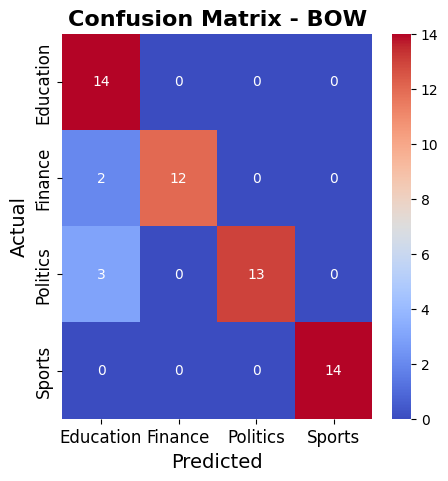

Accuracy - BOW:  0.9137931034482759
F1 Score - BOW:  0.9163222825529603
Classification Report - BOW: 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.86      0.92        14
           2       1.00      0.81      0.90        16
           3       1.00      1.00      1.00        14

    accuracy                           0.91        58
   macro avg       0.93      0.92      0.92        58
weighted avg       0.94      0.91      0.92        58



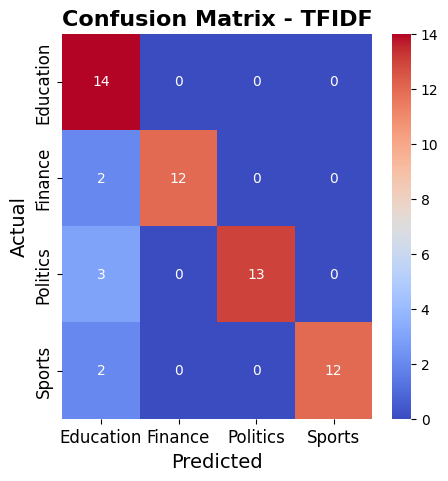

Accuracy - TFIDF:  0.8793103448275862
F1 Score - TFIDF:  0.8860514040062197
Classification Report - TFIDF: 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       1.00      0.86      0.92        14
           2       1.00      0.81      0.90        16
           3       1.00      0.86      0.92        14

    accuracy                           0.88        58
   macro avg       0.92      0.88      0.89        58
weighted avg       0.92      0.88      0.89        58



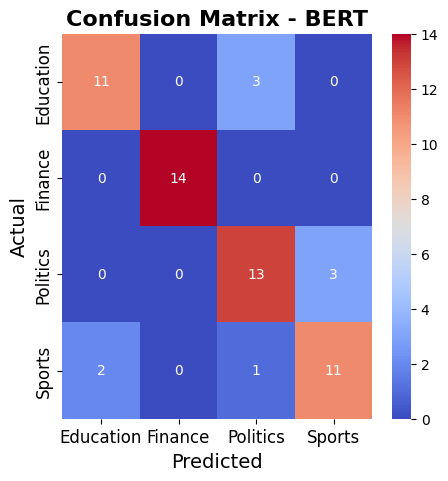

Accuracy - BERT:  0.8448275862068966
F1 Score - BERT:  0.8450597933356554
Classification Report - BERT: 
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       1.00      1.00      1.00        14
           2       0.76      0.81      0.79        16
           3       0.79      0.79      0.79        14

    accuracy                           0.84        58
   macro avg       0.85      0.85      0.85        58
weighted avg       0.85      0.84      0.85        58



,Feature Extraction Technique,Accuracy,F1 Score
0,BOW,0.913793,0.916322
1,TFIDF,0.879310,0.886051
2,BERT,0.844828,0.845060


In [23]:
# Classifier - Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb1.fit(X_train_BOW, y_train_BOW)
gb2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb2.fit(X_train_TFIDF, y_train_TFIDF)
gb3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb3.fit(X_train_BERT, y_train_BERT)

#Evaluation - accuracy, f1 score, confusion matrix, classification report
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, classification_report

#BOW-----------------------------------------------------------------------------------------------------------------
y_pred_BOW = gb1.predict(X_test_BOW)
accuracy_BOW = accuracy_score(y_test_BOW, y_pred_BOW)
f1_BOW = f1_score(y_test_BOW, y_pred_BOW, average='weighted')
conf_matrix_BOW = confusion_matrix(y_test_BOW, y_pred_BOW)
class_report_BOW = classification_report(y_test_BOW, y_pred_BOW)

#Confusion Matrix as heatmap wth seaborn and annot=True
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_BOW, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - BOW', fontname='DejaVu Sans', fontsize=16,fontweight='bold')
plt.xlabel('Predicted', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Actual', fontname='DejaVu Sans', fontsize=14)
plt.xticks(fontname='DejaVu Sans', fontsize=12)
plt.yticks(fontname='DejaVu Sans', fontsize=12)
plt.show()

#display scores
print("Accuracy - BOW: ", accuracy_BOW)
print("F1 Score - BOW: ", f1_BOW)
print("Classification Report - BOW: \n", class_report_BOW)

#TFIDF--------------------------------------------------------------------------------------------
y_pred_TFIDF = gb2.predict(X_test_TFIDF)
accuracy_TFIDF = accuracy_score(y_test_TFIDF, y_pred_TFIDF)
f1_TFIDF = f1_score(y_test_TFIDF, y_pred_TFIDF, average='weighted')
conf_matrix_TFIDF = confusion_matrix(y_test_TFIDF, y_pred_TFIDF)
class_report_TFIDF = classification_report(y_test_TFIDF, y_pred_TFIDF)

#Confusion Matrix as heatmap wth seaborn and annot=True
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_TFIDF, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - TFIDF', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Actual', fontname='DejaVu Sans', fontsize=14)
plt.xticks(fontname='DejaVu Sans', fontsize=12)
plt.yticks(fontname='DejaVu Sans', fontsize=12)
plt.show()

#display scores
print("Accuracy - TFIDF: ", accuracy_TFIDF)
print("F1 Score - TFIDF: ", f1_TFIDF)
print("Classification Report - TFIDF: \n", class_report_TFIDF)

#BERT----------------------------------------------------------------------------------------------------------------------------
y_pred_BERT = gb3.predict(X_test_BERT)
accuracy_BERT = accuracy_score(y_test_BERT, y_pred_BERT)
f1_BERT = f1_score(y_test_BERT, y_pred_BERT, average='weighted')
conf_matrix_BERT = confusion_matrix(y_test_BERT, y_pred_BERT)
class_report_BERT = classification_report(y_test_BERT, y_pred_BERT)

#Confusion Matrix as heatmap wth seaborn and annot=True
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_BERT, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - BERT', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Actual', fontname='DejaVu Sans', fontsize=14)
plt.xticks(fontname='DejaVu Sans', fontsize=12)
plt.yticks(fontname='DejaVu Sans', fontsize=12)
plt.show()

#display scores
print("Accuracy - BERT: ", accuracy_BERT)
print("F1 Score - BERT: ", f1_BERT)
print("Classification Report - BERT: \n", class_report_BERT)

#Display the scores in a table and the best feature extraction technique
import pandas as pd
data = {
 'Feature Extraction Technique': ['BOW', 'TFIDF', 'BERT'],
 'Accuracy': [accuracy_BOW, accuracy_TFIDF, accuracy_BERT],
 'F1 Score': [f1_BOW, f1_TFIDF, f1_BERT]
}
df_scores = pd.DataFrame(data)
df_scores

#best model with feature extraciton technique
best_model = df_scores.loc[df_scores['F1 Score'].idxmax()]
best_model

df_scores.head()

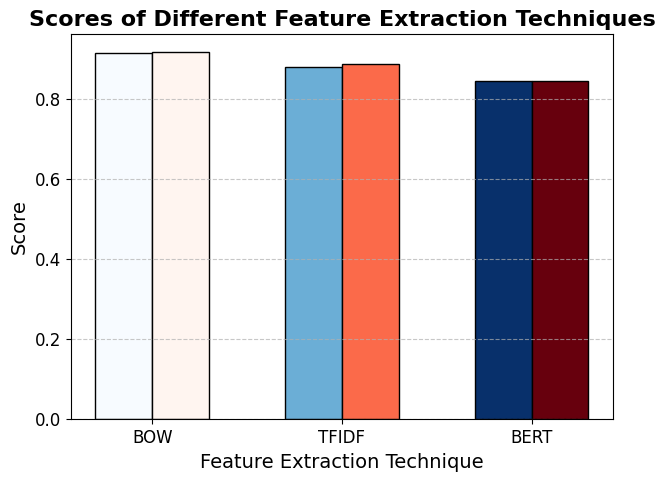

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm # To generate a colormap

# Assuming df_scores is a pandas DataFrame with columns 'Feature Extraction Technique', 'Accuracy', and 'F1 Score'
# Generate positions for grouped bars
x = np.arange(len(df_scores['Feature Extraction Technique'])) # the label locations
width = 0.3 # width of the bars

# Generate a colormap for varied colors
colors_accuracy = cm.get_cmap('Blues', len(df_scores))
colors_f1 = cm.get_cmap('Reds', len(df_scores))
plt.figure(figsize=(7, 5))

# Plot bars for Accuracy with borders and varied colors
for i in range(len(x)):
 plt.bar(x[i] - width/2, df_scores['Accuracy'][i], width,color=colors_accuracy(i / len(x)), edgecolor='black', label='Accuracy' if i == 0 else "")

# Plot bars for F1 Score with borders and varied colors
for i in range(len(x)):
 plt.bar(x[i] + width/2, df_scores['F1 Score'][i], width, color=colors_f1(i / len(x)), edgecolor='black', label='F1 Score' if i == 0 else "")

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.title('Scores of Different Feature Extraction Techniques', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
plt.xlabel('Feature Extraction Technique', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Score', fontname='DejaVu Sans', fontsize=14)

# Add x-ticks with labels
plt.xticks(x, df_scores['Feature Extraction Technique'], fontname='DejaVu Sans', fontsize=12)

# Add y-ticks
plt.yticks(fontname='DejaVu Sans', fontsize=12)

# Show the plot
plt.show()


#### Classifier - ID3

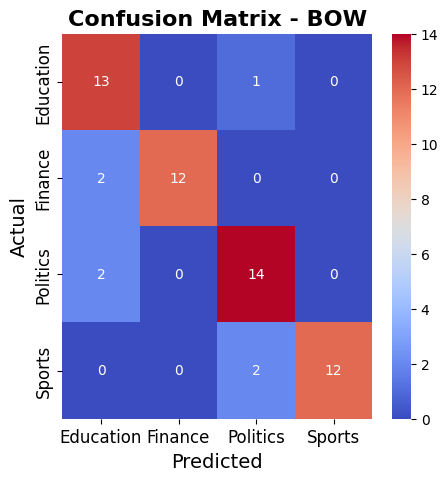

Accuracy - BOW:  0.8793103448275862
F1 Score - BOW:  0.8821352914790068
Classification Report - BOW: 
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       1.00      0.86      0.92        14
           2       0.82      0.88      0.85        16
           3       1.00      0.86      0.92        14

    accuracy                           0.88        58
   macro avg       0.90      0.88      0.88        58
weighted avg       0.89      0.88      0.88        58



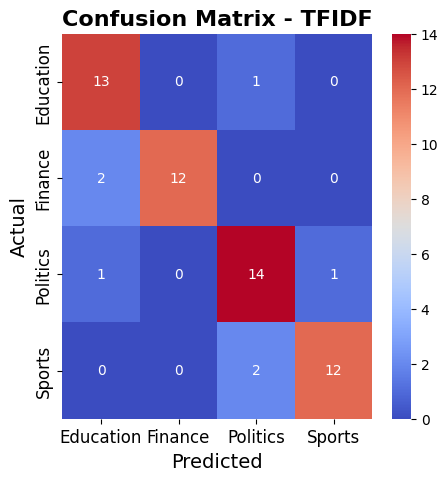

Accuracy - TFIDF:  0.8793103448275862
F1 Score - TFIDF:  0.8806312461484874
Classification Report - TFIDF: 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       1.00      0.86      0.92        14
           2       0.82      0.88      0.85        16
           3       0.92      0.86      0.89        14

    accuracy                           0.88        58
   macro avg       0.89      0.88      0.88        58
weighted avg       0.89      0.88      0.88        58



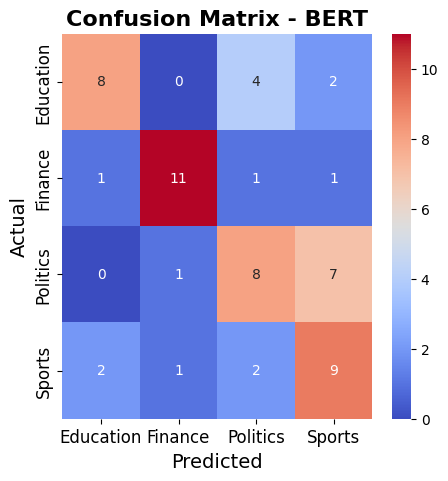

Accuracy - BERT:  0.6206896551724138
F1 Score - BERT:  0.6252040613775874
Classification Report - BERT: 
               precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.85      0.79      0.81        14
           2       0.53      0.50      0.52        16
           3       0.47      0.64      0.55        14

    accuracy                           0.62        58
   macro avg       0.65      0.62      0.63        58
weighted avg       0.64      0.62      0.63        58

Feature Extraction Technique         BOW
Accuracy                         0.87931
F1 Score                        0.882135
Name: 0, dtype: object


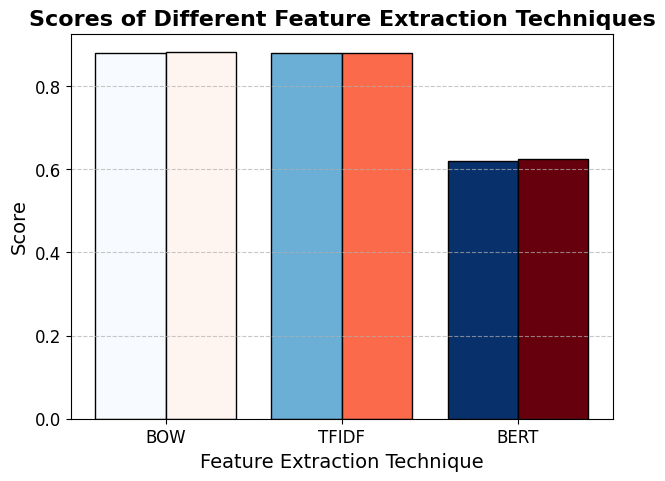

,Feature Extraction Technique,Accuracy,F1 Score
0,BOW,0.87931,0.882135
1,TFIDF,0.87931,0.880631
2,BERT,0.62069,0.625204


In [25]:
#same process with ID3
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()
dt1.fit(X_train_BOW, y_train_BOW)
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_TFIDF, y_train_TFIDF)
dt3 = DecisionTreeClassifier()
dt3.fit(X_train_BERT, y_train_BERT)

#Evaluation - accuracy, f1 score, confusion matrix, classification report
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, classification_report

#BOW-----------------------------------------------------------------------------------------------------------------
y_pred_BOW = dt1.predict(X_test_BOW)
accuracy_BOW = accuracy_score(y_test_BOW, y_pred_BOW)
f1_BOW = f1_score(y_test_BOW, y_pred_BOW, average='weighted')
conf_matrix_BOW = confusion_matrix(y_test_BOW, y_pred_BOW)
class_report_BOW = classification_report(y_test_BOW, y_pred_BOW)

#Confusion Matrix as heatmap wth seaborn and annot=True
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_BOW, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - BOW', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Actual', fontname='DejaVu Sans', fontsize=14)
plt.xticks(fontname='DejaVu Sans', fontsize=12)
plt.yticks(fontname='DejaVu Sans', fontsize=12)
plt.show()

#display scores
print("Accuracy - BOW: ", accuracy_BOW)
print("F1 Score - BOW: ", f1_BOW)
print("Classification Report - BOW: \n", class_report_BOW)

#TFIDF--------------------------------------------------------------------------------------------
y_pred_TFIDF = dt2.predict(X_test_TFIDF)
accuracy_TFIDF = accuracy_score(y_test_TFIDF, y_pred_TFIDF)
f1_TFIDF = f1_score(y_test_TFIDF, y_pred_TFIDF, average='weighted')
conf_matrix_TFIDF = confusion_matrix(y_test_TFIDF, y_pred_TFIDF)
class_report_TFIDF = classification_report(y_test_TFIDF, y_pred_TFIDF)

#Confusion Matrix as heatmap wth seaborn and annot=True
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_TFIDF, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - TFIDF', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Actual', fontname='DejaVu Sans', fontsize=14)
plt.xticks(fontname='DejaVu Sans', fontsize=12)
plt.yticks(fontname='DejaVu Sans', fontsize=12)
plt.show()

#display scores
print("Accuracy - TFIDF: ", accuracy_TFIDF)
print("F1 Score - TFIDF: ", f1_TFIDF)
print("Classification Report - TFIDF: \n", class_report_TFIDF)

#BERT----------------------------------------------------------------------------------------------------------------------------
y_pred_BERT = dt3.predict(X_test_BERT)
accuracy_BERT = accuracy_score(y_test_BERT, y_pred_BERT)
f1_BERT = f1_score(y_test_BERT, y_pred_BERT, average='weighted')
conf_matrix_BERT = confusion_matrix(y_test_BERT, y_pred_BERT)
class_report_BERT = classification_report(y_test_BERT, y_pred_BERT)

#Confusion Matrix as heatmap wth seaborn and annot=True
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_BERT, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - BERT', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Actual', fontname='DejaVu Sans', fontsize=14)
plt.xticks(fontname='DejaVu Sans', fontsize=12)
plt.yticks(fontname='DejaVu Sans', fontsize=12)
plt.show()

#display scores
print("Accuracy - BERT: ", accuracy_BERT)
print("F1 Score - BERT: ", f1_BERT)
print("Classification Report - BERT: \n", class_report_BERT)

#Display the scores in a table and the best feature extraction technique
import pandas as pd
data = {
 'Feature Extraction Technique': ['BOW', 'TFIDF', 'BERT'],
 'Accuracy': [accuracy_BOW, accuracy_TFIDF, accuracy_BERT],
 'F1 Score': [f1_BOW, f1_TFIDF, f1_BERT]
}
df_scores = pd.DataFrame(data)

#best model with feature extraciton technique
best_model = df_scores.loc[df_scores['F1 Score'].idxmax()]
print(best_model)
df_scores.head()

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm # To generate a colormap

# Assuming df_scores is a pandas DataFrame with columns 'Feature Extraction Technique', 'Accuracy', and 'F1 Score'
# Generate positions for grouped bars
x = np.arange(len(df_scores['Feature Extraction Technique'])) # the label locations
width = 0.4 # width of the bars

# Generate a colormap for varied colors
colors_accuracy = cm.get_cmap('Blues', len(df_scores))
colors_f1 = cm.get_cmap('Reds', len(df_scores))
plt.figure(figsize=(7, 5))

# Plot bars for Accuracy with borders and varied colors
for i in range(len(x)):
 plt.bar(x[i] - width/2, df_scores['Accuracy'][i], width, color=colors_accuracy(i / len(x)), edgecolor='black', label='Accuracy' if i == 0 else "")

# Plot bars for F1 Score with borders and varied colors
for i in range(len(x)):
 plt.bar(x[i] + width/2, df_scores['F1 Score'][i], width, color=colors_f1(i / len(x)), edgecolor='black', label='F1 Score' if i == 0 else "")

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.title('Scores of Different Feature Extraction Techniques', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
plt.xlabel('Feature Extraction Technique', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Score', fontname='DejaVu Sans', fontsize=14)

# Add x-ticks with labels
plt.xticks(x, df_scores['Feature Extraction Technique'], fontname='DejaVu Sans', fontsize=12)

# Add y-ticks
plt.yticks(fontname='DejaVu Sans', fontsize=12)

# Show the plot
plt.show()
df_scores.head()

#### Classifier - Random Forest

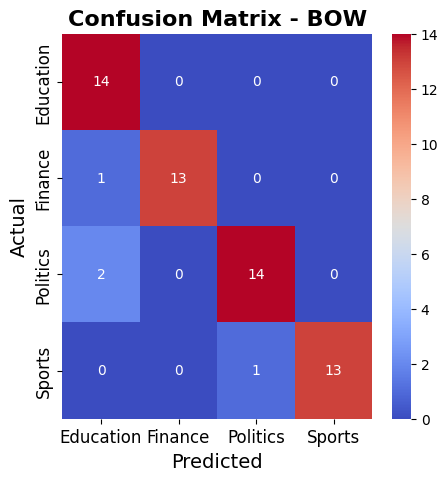

Accuracy - BOW:  0.9310344827586207
F1 Score - BOW:  0.9320644337329542
Classification Report - BOW: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.93      0.96        14
           2       0.93      0.88      0.90        16
           3       1.00      0.93      0.96        14

    accuracy                           0.93        58
   macro avg       0.94      0.93      0.93        58
weighted avg       0.94      0.93      0.93        58



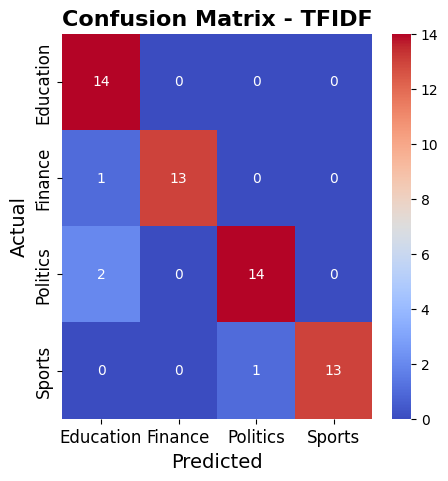

Accuracy - TFIDF:  0.9310344827586207
F1 Score - TFIDF:  0.9320644337329542
Classification Report - TFIDF: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.93      0.96        14
           2       0.93      0.88      0.90        16
           3       1.00      0.93      0.96        14

    accuracy                           0.93        58
   macro avg       0.94      0.93      0.93        58
weighted avg       0.94      0.93      0.93        58



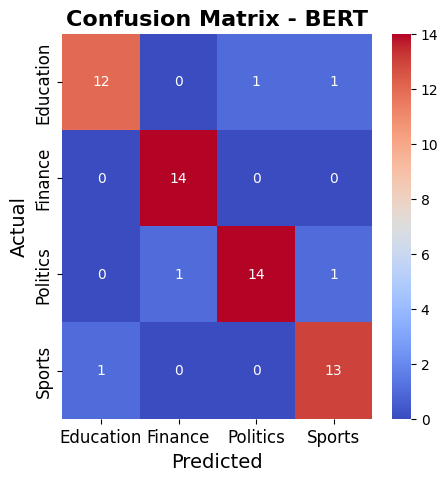

Accuracy - BERT:  0.9137931034482759
F1 Score - BERT:  0.9131900493950281
Classification Report - BERT: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.93      1.00      0.97        14
           2       0.93      0.88      0.90        16
           3       0.87      0.93      0.90        14

    accuracy                           0.91        58
   macro avg       0.91      0.92      0.91        58
weighted avg       0.91      0.91      0.91        58

Best Feature Extraction Technique:
 Feature Extraction Technique         BOW
Accuracy                        0.931034
F1 Score                        0.932064
Name: 0, dtype: object


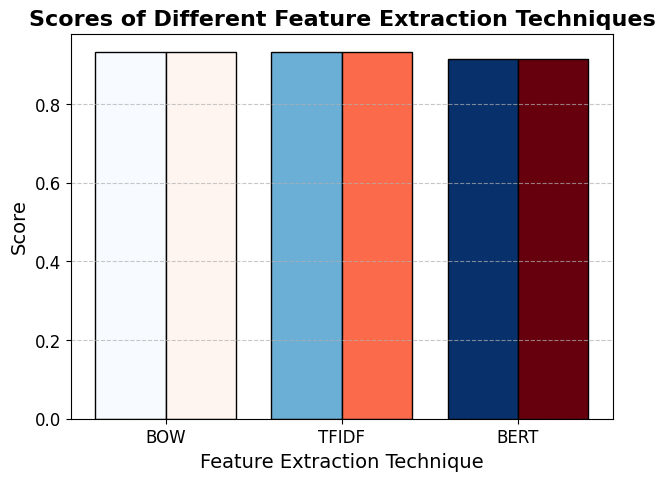

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm # To generate a colormap

# Random Forest Classifier
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train_BOW, y_train_BOW)
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_train_TFIDF, y_train_TFIDF)
rf3 = RandomForestClassifier(random_state=42)
rf3.fit(X_train_BERT, y_train_BERT)

# Evaluation - Accuracy, F1 Score, Confusion Matrix, Classification Report
# BOW
y_pred_BOW = rf1.predict(X_test_BOW)
accuracy_BOW = accuracy_score(y_test_BOW, y_pred_BOW)
f1_BOW = f1_score(y_test_BOW, y_pred_BOW, average='weighted')
conf_matrix_BOW = confusion_matrix(y_test_BOW, y_pred_BOW)
class_report_BOW = classification_report(y_test_BOW, y_pred_BOW)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_BOW, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - BOW', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Actual', fontname='DejaVu Sans', fontsize=14)
plt.xticks(fontname='DejaVu Sans', fontsize=12)
plt.yticks(fontname='DejaVu Sans', fontsize=12)
plt.show()

print("Accuracy - BOW: ", accuracy_BOW)
print("F1 Score - BOW: ", f1_BOW)
print("Classification Report - BOW: \n", class_report_BOW)

# TFIDF
y_pred_TFIDF = rf2.predict(X_test_TFIDF)
accuracy_TFIDF = accuracy_score(y_test_TFIDF, y_pred_TFIDF)
f1_TFIDF = f1_score(y_test_TFIDF, y_pred_TFIDF, average='weighted')
conf_matrix_TFIDF = confusion_matrix(y_test_TFIDF, y_pred_TFIDF)
class_report_TFIDF = classification_report(y_test_TFIDF, y_pred_TFIDF)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_TFIDF, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - TFIDF', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Actual', fontname='DejaVu Sans', fontsize=14)
plt.xticks(fontname='DejaVu Sans', fontsize=12)
plt.yticks(fontname='DejaVu Sans', fontsize=12)
plt.show()

print("Accuracy - TFIDF: ", accuracy_TFIDF)
print("F1 Score - TFIDF: ", f1_TFIDF)
print("Classification Report - TFIDF: \n", class_report_TFIDF)

# BERT
y_pred_BERT = rf3.predict(X_test_BERT)
accuracy_BERT = accuracy_score(y_test_BERT, y_pred_BERT)
f1_BERT = f1_score(y_test_BERT, y_pred_BERT, average='weighted')
conf_matrix_BERT = confusion_matrix(y_test_BERT, y_pred_BERT)
class_report_BERT = classification_report(y_test_BERT, y_pred_BERT)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_BERT, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - BERT', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Actual', fontname='DejaVu Sans', fontsize=14)
plt.xticks(fontname='DejaVu Sans', fontsize=12)
plt.yticks(fontname='DejaVu Sans', fontsize=12)
plt.show()

print("Accuracy - BERT: ", accuracy_BERT)
print("F1 Score - BERT: ", f1_BERT)
print("Classification Report - BERT: \n", class_report_BERT)

# Display Scores in a Table
data = {
 'Feature Extraction Technique': ['BOW', 'TFIDF', 'BERT'],
 'Accuracy': [accuracy_BOW, accuracy_TFIDF, accuracy_BERT],
 'F1 Score': [f1_BOW, f1_TFIDF, f1_BERT]
}
df_scores = pd.DataFrame(data)

# Identify the best model
best_model = df_scores.loc[df_scores['F1 Score'].idxmax()]
print("Best Feature Extraction Technique:\n", best_model)

# Display Scores in Graphical Format
x = np.arange(len(df_scores['Feature Extraction Technique']))
width = 0.4
colors_accuracy = cm.get_cmap('Blues', len(df_scores))
colors_f1 = cm.get_cmap('Reds', len(df_scores))
plt.figure(figsize=(7, 5))
# Plot Accuracy Bars
for i in range(len(x)):
 plt.bar(x[i] - width/2, df_scores['Accuracy'][i], width, color=colors_accuracy(i / len(x)), edgecolor='black', label='Accuracy' if i == 0 else "")

# Plot F1 Score Bars
for i in range(len(x)):
 plt.bar(x[i] + width/2, df_scores['F1 Score'][i], width, color=colors_f1(i / len(x)), edgecolor='black', label='F1 Score' if i == 0 else "")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Scores of Different Feature Extraction Techniques', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
plt.xlabel('Feature Extraction Technique', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Score', fontname='DejaVu Sans', fontsize=14)
plt.xticks(x, df_scores['Feature Extraction Technique'], fontname='DejaVu Sans', fontsize=12)
plt.yticks(fontname='DejaVu Sans', fontsize=12)
plt.show()

#### Classifier - Word Embedding with LSTM

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 8s/step - accuracy: 0.1757 - loss: 1.3928 - val_accuracy: 0.2222 - val_loss: 1.3900
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.2100 - loss: 1.3841 - val_accuracy: 0.2222 - val_loss: 1.3943
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - accuracy: 0.3150 - loss: 1.3832 - val_accuracy: 0.1852 - val_loss: 1.3999
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.2682 - loss: 1.3785 - val_accuracy: 0.1852 - val_loss: 1.4024
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 7s/step - accuracy: 0.2796 - loss: 1.3853 - val_accuracy: 0.1852 - val_loss: 1.4029
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step


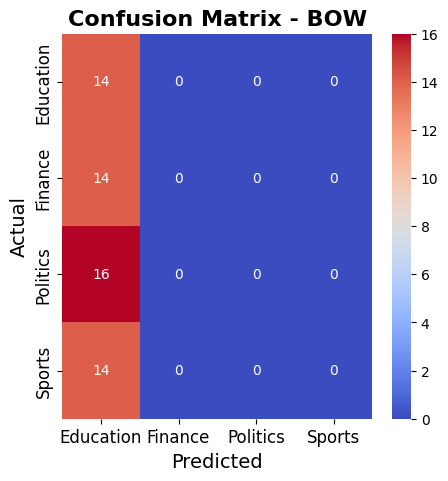

Accuracy - BOW:  0.2413793103448276
F1 Score - BOW:  0.09386973180076628
Classification Report - BOW: 
               precision    recall  f1-score   support

           0       0.24      1.00      0.39        14
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        14

    accuracy                           0.24        58
   macro avg       0.06      0.25      0.10        58
weighted avg       0.06      0.24      0.09        58

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.2536 - loss: 1.3881 - val_accuracy: 0.2222 - val_loss: 1.3912
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.2692 - loss: 1.3857 - val_accuracy: 0.1852 - val_loss: 1.3981
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.2953 - loss: 1.3826 - val_accuracy: 0.1852 - val_loss: 1.4055
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.2526 - loss: 1.3832 - val_accur

1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


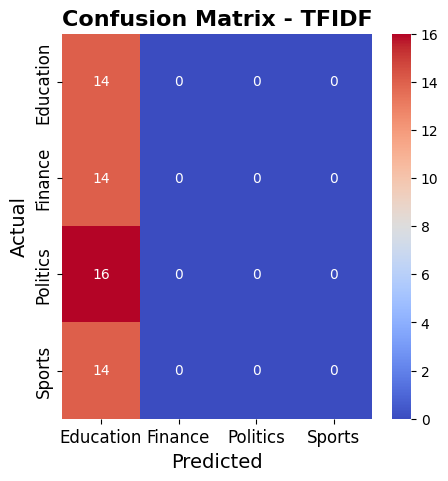

Accuracy - TFIDF:  0.2413793103448276
F1 Score - TFIDF:  0.09386973180076628
Classification Report - TFIDF: 
               precision    recall  f1-score   support

           0       0.24      1.00      0.39        14
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        14

    accuracy                           0.24        58
   macro avg       0.06      0.25      0.10        58
weighted avg       0.06      0.24      0.09        58

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 7s/step - accuracy: 0.2505 - loss: 1.3868 - val_accuracy: 0.2222 - val_loss: 1.3877
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 7s/step - accuracy: 0.2224 - loss: 1.3882 - val_accuracy: 0.1852 - val_loss: 1.3965
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 7s/step - accuracy: 0.2734 - loss: 1.3898 - val_accuracy: 0.1852 - val_loss: 1.4035
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.2744 - loss: 1.3831 - val

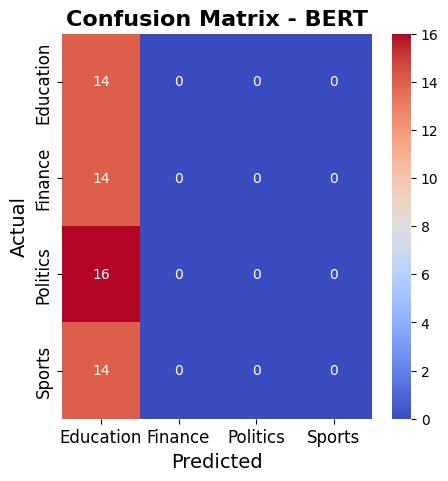

Accuracy - BERT:  0.2413793103448276
F1 Score - BERT:  0.09386973180076628
Classification Report - BERT: 
               precision    recall  f1-score   support

           0       0.24      1.00      0.39        14
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        14

    accuracy                           0.24        58
   macro avg       0.06      0.25      0.10        58
weighted avg       0.06      0.24      0.09        58

Best Feature Extraction Technique:
 Feature Extraction Technique         BOW
Accuracy                        0.241379
F1 Score                         0.09387
Name: 0, dtype: object


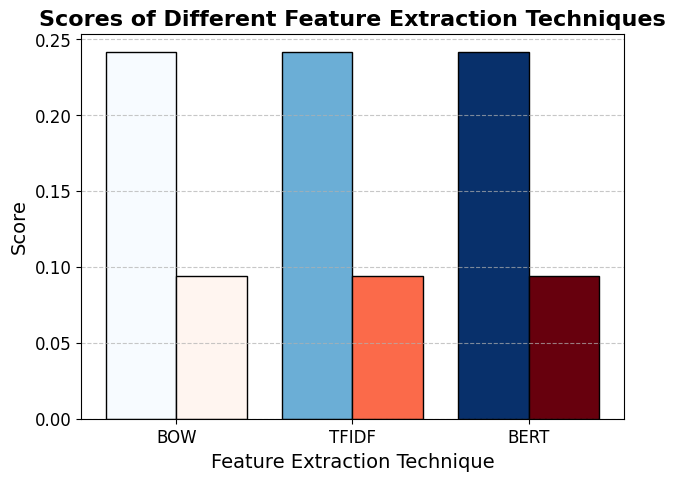

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import matplotlib.cm as cm
import pandas as pd # Make sure pandas is imported
import numpy as np

# Define LSTM Model
def build_lstm_model(input_dim, output_dim, input_length):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length),
        SpatialDropout1D(0.2),
        Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)),
        Dense(len(encoder.classes_), activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Training and evaluation for each feature extraction technique
results_list = []  # Initialize an empty list to store results
for name, (X_train, X_test, y_train, y_test) in {
    "BOW": (X_train_BOW, X_test_BOW, y_train_BOW, y_test_BOW),
    "TFIDF": (X_train_TFIDF, X_test_TFIDF, y_train_TFIDF, y_test_TFIDF),
    "BERT": (X_train_BERT, X_test_BERT, y_train_BERT, y_test_BERT)
}.items():

    # Padding sequences (necessary for LSTM)
    max_length = max([len(seq) for seq in X_train])
    X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
    X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post')

    # One-hot encode labels
    y_train_cat = to_categorical(y_train, num_classes=len(encoder.classes_))
    y_test_cat = to_categorical(y_test, num_classes=len(encoder.classes_))

    # Build and train model
    model = build_lstm_model(input_dim=X_train_padded.shape[1], output_dim=128, input_length=max_length)
    model.fit(X_train_padded, y_train_cat, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

    # Predictions
    y_pred_prob = model.predict(X_test_padded)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Confusion Matrix Visualization
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f'Confusion Matrix - {name}', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontname='DejaVu Sans', fontsize=14)
    plt.ylabel('Actual', fontname='DejaVu Sans', fontsize=14)
    plt.xticks(fontname='DejaVu Sans', fontsize=12)
    plt.yticks(fontname='DejaVu Sans', fontsize=12)
    plt.show()

    print(f"Accuracy - {name}: ", accuracy)
    print(f"F1 Score - {name}: ", f1)
    print(f"Classification Report - {name}: \n", class_report)

    # Append results to the list
    results_list.append({'Feature Extraction Technique': name, 'Accuracy': accuracy, 'F1 Score': f1})

# Create DataFrame from the list of results
results = pd.DataFrame(results_list)

# Identify the best model
best_model = results.loc[results['F1 Score'].idxmax()]
print("Best Feature Extraction Technique:\n", best_model)

# Display Scores in Graphical Format
x = np.arange(len(results['Feature Extraction Technique']))
width = 0.4
colors_accuracy = cm.get_cmap('Blues', len(results))
colors_f1 = cm.get_cmap('Reds', len(results))
plt.figure(figsize=(7, 5))

for i in range(len(x)):
    plt.bar(x[i] - width/2, results['Accuracy'][i], width, color=colors_accuracy(i / len(x)), edgecolor='black', label='Accuracy' if i == 0 else "")
    plt.bar(x[i] + width/2, results['F1 Score'][i], width, color=colors_f1(i / len(x)), edgecolor='black', label='F1 Score' if i == 0 else "")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Scores of Different Feature Extraction Techniques', fontname='DejaVu Sans', fontsize=16, fontweight='bold')
plt.xlabel('Feature Extraction Technique', fontname='DejaVu Sans', fontsize=14)
plt.ylabel('Score', fontname='DejaVu Sans', fontsize=14)
plt.xticks(x, results['Feature Extraction Technique'], fontname='DejaVu Sans', fontsize=12)
plt.yticks(fontname='DejaVu Sans', fontsize=12)
plt.show()